In [167]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import time
from datetime import timedelta

In [168]:
df = pd.read_json('./yelp_academic_dataset_business.json', lines=True)

In [169]:
print("df.shape", df.shape)
df.head()

df.shape (150346, 14)


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [170]:
# drop all records with NA values and drop irrelevant columns
df = df.dropna()
df = df.drop(columns=['name', 'address', 'city'])
print("df.shape", df.shape)

df.shape (117618, 11)


In [171]:
# only keep currently open businesses
df = df[df['is_open']==1]
# remove is_open column since it only contains 1s now
df = df.drop(columns='is_open')
print("df.shape", df.shape)
df.head()

df.shape (94976, 10)


,business_id,state,postal_code,latitude,longitude,stars,review_count,attributes,categories,hours
1,mpf3x-BjTdTEA3yCZrAYPw,MO,63123,38.551126,-90.335695,3.0,15,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
3,MTSW4McQd7CbVtyjqoe9mw,PA,19107,39.955505,-75.155564,4.0,80,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,PA,18054,40.338183,-75.471659,4.5,13,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."
5,CF33F8-E6oudUQ46HnavjQ,TN,37015,36.269593,-87.058943,2.0,6,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '..."
6,n_0UpQx1hsNbnPUSlodU8w,MO,63144,38.627695,-90.340465,2.5,13,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Sporting Goods, Fashion, Shoe Stores, Shopping...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-18:0', ..."


In [172]:
# only keep businesses that are categorizes as 'Restaurants'
df = df[df['categories'].str.contains('Restaurants')]
print("df.shape", df.shape)
df.head()

df.shape (31357, 10)


,business_id,state,postal_code,latitude,longitude,stars,review_count,attributes,categories,hours
3,MTSW4McQd7CbVtyjqoe9mw,PA,19107,39.955505,-75.155564,4.0,80,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
5,CF33F8-E6oudUQ46HnavjQ,TN,37015,36.269593,-87.058943,2.0,6,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '..."
9,bBDDEgkFA1Otx9Lfe7BZUQ,TN,37207,36.208102,-86.768170,1.5,10,"{'RestaurantsAttire': ''casual'', 'Restaurants...","Ice Cream & Frozen Yogurt, Fast Food, Burgers,...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '..."
11,eEOYSgkmpB90uNA7lDOMRA,FL,33602,27.955269,-82.456320,4.0,10,"{'Alcohol': ''none'', 'OutdoorSeating': 'None'...","Vietnamese, Food, Restaurants, Food Trucks","{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'..."
12,il_Ro8jwPlHresjw9EGmBg,IN,46227,39.637133,-86.127217,2.5,28,"{'RestaurantsReservations': 'False', 'Restaura...","American (Traditional), Restaurants, Diners, B...","{'Monday': '6:0-22:0', 'Tuesday': '6:0-22:0', ..."


In [173]:
df = df.join(pd.json_normalize(df['attributes']))
df = df.join(pd.json_normalize(df['hours']))
df = df.drop(columns=['attributes', 'hours'])

In [174]:
def parse_hours(day_hours_str):
    if pd.isna(day_hours_str):
        return 0
    
    time_endpoints = str(day_hours_str).split('-')

    if time_endpoints[0] == time_endpoints[1]:
        # 0:0-0:0
        return 0
    
    start_time = time.strptime(time_endpoints[0], "%H:%M")
    end_time = time.strptime(time_endpoints[1], "%H:%M")

    # account for edge cases in data where we have 10-1, which is technically 10am-1am
    et_hour = (24 + end_time.tm_hour) if end_time.tm_hour < start_time.tm_hour else end_time.tm_hour
    
    start_time_td = timedelta(hours=start_time.tm_hour, minutes=start_time.tm_min)
    end_time_td = timedelta(hours=et_hour, minutes=end_time.tm_min)

    duration = end_time_td - start_time_td

    return duration.total_seconds() / 3600

total_hours_arr = []
count_neg = 0

for ind in df.index:
    total_hours = 0
    
    # print(df['name'][ind])
    # print(df['address'][ind])
    
    monday_hours_str = df['Monday'][ind]
    # print("monday hours string", monday_hours_str)
    monday_hours = parse_hours(monday_hours_str)
    # print("monday hours parsed", monday_hours)
    total_hours += monday_hours

    tuesday_hours_str = df['Tuesday'][ind]
    # print("tuesday hours string", tuesday_hours_str)
    tuesday_hours = parse_hours(tuesday_hours_str)
    # print("tuesday hours parsed", tuesday_hours)
    total_hours += tuesday_hours

    wednesday_hours_str = df['Wednesday'][ind]
    # print("wednesday hours string", wednesday_hours_str)
    wednesday_hours = parse_hours(wednesday_hours_str)
    # print("wednesday hours parsed", wednesday_hours)
    total_hours += wednesday_hours

    thursday_hours_str = df['Thursday'][ind]
    # print("thursday hours string", thursday_hours_str)
    thursday_hours = parse_hours(thursday_hours_str)
    # print("thursday hours parsed", thursday_hours)
    total_hours += thursday_hours

    friday_hours_str = df['Friday'][ind]
    # print("friday hours string", friday_hours_str)
    friday_hours = parse_hours(friday_hours_str)
    # print("friday hours parsed", friday_hours)
    total_hours += friday_hours

    saturday_hours_str = df['Saturday'][ind]
    # print("saturday hours string", saturday_hours_str)
    saturday_hours = parse_hours(saturday_hours_str)
    # print("saturday hours parsed", saturday_hours)
    total_hours += saturday_hours

    sunday_hours_str = df['Sunday'][ind]
    # print("sunday hours string", sunday_hours_str)
    sunday_hours = parse_hours(sunday_hours_str)
    # print("sunday hours parsed", sunday_hours)
    total_hours += sunday_hours

    total_hours_arr.append(total_hours)

df['total_open_hours'] = total_hours_arr
df = df.drop(columns=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
df.head()

,business_id,state,postal_code,latitude,longitude,stars,review_count,categories,RestaurantsDelivery,OutdoorSeating,...,BYOB,Corkage,BYOBCorkage,RestaurantsCounterService,Open24Hours,AgesAllowed,AcceptsInsurance,DietaryRestrictions,HairSpecializesIn,total_open_hours
3,MTSW4McQd7CbVtyjqoe9mw,PA,19107,39.955505,-75.155564,4.0,80,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
5,CF33F8-E6oudUQ46HnavjQ,TN,37015,36.269593,-87.058943,2.0,6,"Burgers, Fast Food, Sandwiches, Food, Ice Crea...",True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.0
9,bBDDEgkFA1Otx9Lfe7BZUQ,TN,37207,36.208102,-86.768170,1.5,10,"Ice Cream & Frozen Yogurt, Fast Food, Burgers,...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0
11,eEOYSgkmpB90uNA7lDOMRA,FL,33602,27.955269,-82.456320,4.0,10,"Vietnamese, Food, Restaurants, Food Trucks",True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0
12,il_Ro8jwPlHresjw9EGmBg,IN,46227,39.637133,-86.127217,2.5,28,"American (Traditional), Restaurants, Diners, B...",False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0


In [175]:
df = df.filter(['total_open_hours', 'RestaurantsTakeOut', 'RestaurantsDelivery', 'Alcohol', 'latitude', 'longitude', 'stars'])

In [176]:
df.head()

,total_open_hours,RestaurantsTakeOut,RestaurantsDelivery,Alcohol,latitude,longitude,stars
3,23.0,NaN,NaN,'none',39.955505,-75.155564,4.0
5,53.0,True,True,'full_bar',36.269593,-87.058943,2.0
9,100.0,NaN,NaN,NaN,36.208102,-86.768170,1.5
11,36.0,True,True,NaN,27.955269,-82.456320,4.0
12,34.0,True,False,u'full_bar',39.637133,-86.127217,2.5


In [177]:
df['RestaurantsTakeOut'] = df['RestaurantsTakeOut'].fillna('False')
df['RestaurantsDelivery'] = df['RestaurantsDelivery'].fillna('False')
df['Alcohol'] = df['Alcohol'].fillna('False')

In [178]:
df['Alcohol'].value_counts()

Alcohol
False               26276
u'none'              2017
u'full_bar'          1418
'none'                626
u'beer_and_wine'      573
'full_bar'            298
'beer_and_wine'       142
None                    7
Name: count, dtype: int64

In [179]:
def alcohol_tf(val):
    if 'beer_and_wine' in val or 'full_bar' in val:
        return True
    else :
        return False

In [180]:
df['Alcohol_TF'] = df['Alcohol'].apply(alcohol_tf)

In [181]:
df.head()

,total_open_hours,RestaurantsTakeOut,RestaurantsDelivery,Alcohol,latitude,longitude,stars,Alcohol_TF
3,23.0,False,False,'none',39.955505,-75.155564,4.0,False
5,53.0,True,True,'full_bar',36.269593,-87.058943,2.0,True
9,100.0,False,False,False,36.208102,-86.768170,1.5,False
11,36.0,True,True,False,27.955269,-82.456320,4.0,False
12,34.0,True,False,u'full_bar',39.637133,-86.127217,2.5,True


In [182]:
df.replace('None', 'False', inplace=True)
df.replace({'True': True, 'False': False}, inplace=True)
df.drop(columns=['Alcohol'], inplace = True)
df = df.rename(columns={'Alcohol_TF':'Alcohol'})

In [183]:
df.head()

,total_open_hours,RestaurantsTakeOut,RestaurantsDelivery,latitude,longitude,stars,Alcohol
3,23.0,False,False,39.955505,-75.155564,4.0,False
5,53.0,True,True,36.269593,-87.058943,2.0,True
9,100.0,False,False,36.208102,-86.768170,1.5,False
11,36.0,True,True,27.955269,-82.456320,4.0,False
12,34.0,True,False,39.637133,-86.127217,2.5,True


In [184]:
# Isolation Forests Outlier Detection
ad_df = df.copy()
from sklearn.ensemble import IsolationForest
X = ad_df.loc[:, ad_df.columns != 'stars']
clf = IsolationForest(random_state=0).fit_predict(X)
ad_df['outlier'] = clf
ad_df['outlier'].value_counts()

outlier
 1    21917
-1     9440
Name: count, dtype: int64

In [185]:
# K Means Clustering Outlier Detection

from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=2, random_state=0)

anomaly_df = df.copy()
X = anomaly_df.loc[:, anomaly_df.columns != 'stars']
k_means.fit(X)

anomaly_df['cluster'] = k_means.predict(X)
anomaly_df['cluster'].value_counts()

cluster
1    25827
0     5530
Name: count, dtype: int64

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31357 entries, 3 to 150339
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   total_open_hours     31357 non-null  float64
 1   RestaurantsTakeOut   31357 non-null  bool   
 2   RestaurantsDelivery  31357 non-null  bool   
 3   latitude             31357 non-null  float64
 4   longitude            31357 non-null  float64
 5   stars                31357 non-null  float64
 6   Alcohol              31357 non-null  bool   
dtypes: bool(3), float64(4)
memory usage: 2.3 MB


In [187]:
df.reset_index()

from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

location_df = df[['latitude', 'longitude', 'stars']]

stars = location_df['stars']
location_df = location_df.drop(columns='stars')

scaler = StandardScaler()
location_df = pd.DataFrame(scaler.fit_transform(location_df), columns=location_df.columns)

neigh = NearestNeighbors(n_neighbors=51, n_jobs=-1)

neigh.fit(location_df[['latitude', 'longitude']])

distances, indices = neigh.kneighbors(location_df[['latitude', 'longitude']])

for i in range(len(location_df)):
    location_df.loc[i, 'avg_star_rating'] = stars.iloc[indices[i]].mean()

In [188]:
# DATA CLUSTERING FROM AKSHAT

# from sklearn.cluster import KMeans

# kmeans = KMeans(n_clusters=11)

# kmeans.fit(location_df)

# location_df['cluster'] = kmeans.predict(location_df)

# colors = ['red', 'blue', 'green', 'yellow', 'purple', 'orange', 'pink', 'brown', 'black', 'gray', 'cyan']

# plt.scatter(location_df['latitude'], location_df['longitude'], c=location_df['cluster'].apply(lambda x: colors[x]))

In [189]:
df['stack_1'] = location_df['avg_star_rating'].values
df.drop(columns=['latitude', 'longitude'], inplace=True)
df.head()

,total_open_hours,RestaurantsTakeOut,RestaurantsDelivery,stars,Alcohol,stack_1
3,23.0,False,False,4.0,False,3.960784
5,53.0,True,True,2.0,True,3.225490
9,100.0,False,False,1.5,False,3.235294
11,36.0,True,True,4.0,False,3.931373
12,34.0,True,False,2.5,True,3.284314


In [190]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
clf = DecisionTreeRegressor(random_state=0)
X = df.loc[:, df.columns != 'stars']
y = df.loc[:, 'stars']
# fitting the model based on max_depth = 4 because we have 4 features, splitting on them
regressor = DecisionTreeRegressor(random_state=0, max_depth=4)
# no need to normalize for decision tree regressor
regressor.fit(X, y) 
y_pred = regressor.predict(X) 
df['stack_2'] = y_pred
df = df[['RestaurantsTakeOut', 'RestaurantsDelivery', 'Alcohol', 'total_open_hours', 'stack_1', 'stack_2', 'stars']]
# at this point, df is the final dataframe we are using (need to do CV for stack_1 and stack_2 models)
df.head()

,RestaurantsTakeOut,RestaurantsDelivery,Alcohol,total_open_hours,stack_1,stack_2,stars
3,False,False,False,23.0,3.960784,3.927477,4.0
5,True,True,True,53.0,3.225490,3.176283,2.0
9,False,False,False,100.0,3.235294,3.176283,1.5
11,True,True,False,36.0,3.931373,3.927477,4.0
12,True,False,True,34.0,3.284314,3.264409,2.5


### Linear Regression

In [191]:
labels = df['stars']
features_without_stacks = df.drop(columns=['stack_1', 'stack_2', 'stars'])
features_stack1 = df.drop(columns=['stack_2', 'stars'])
features_stack2 = df.drop(columns=['stack_1', 'stars'])
features_all_stacks = df.drop(columns=['stars'])
features_onlystacks = df.drop(columns=['RestaurantsTakeOut', 'RestaurantsDelivery', 'Alcohol', 'total_open_hours','stars'])

In [192]:
#features_without_stacks

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

X = features_without_stacks
y = labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
reg = LinearRegression().fit(X_train, y_train)

scores = cross_val_score(reg, X, y, cv=10)
# print(scores)
print('R2 using cv :',np.mean(scores))

print('R2 score using split: ', reg.score(X_test, y_test))
print('Intercept:', reg.intercept_)
df['stack_3'] = reg.predict(X)
df.head()

R2 using cv : -0.0005328556723235734
R2 score using split:  0.00013538442139393592
Intercept: 3.5374066553872203


,RestaurantsTakeOut,RestaurantsDelivery,Alcohol,total_open_hours,stack_1,stack_2,stars,stack_3
3,False,False,False,23.0,3.960784,3.927477,4.0,3.544366
5,True,True,True,53.0,3.225490,3.176283,2.0,3.540111
9,False,False,False,100.0,3.235294,3.176283,1.5,3.567663
11,True,True,False,36.0,3.931373,3.927477,4.0,3.520521
12,True,False,True,34.0,3.284314,3.264409,2.5,3.535014


In [193]:
print(df['stack_1'].isna().sum())
print(df['stack_2'].isna().sum())

0
0


In [194]:
#features_stack1

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

X = features_stack1
y = labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
reg = LinearRegression().fit(X_train, y_train)

scores = cross_val_score(reg, X, y, cv=10)
# print(scores)
print('R2 using cv :',np.mean(scores))

print('R2 score using split: ', reg.score(X_test, y_test))
print('Intercept:', reg.intercept_)
df['stack_3'] = reg.predict(X)
df.head()

R2 using cv : 0.09945996610551135
R2 score using split:  0.10846244817929762
Intercept: 0.02423151652638289


,RestaurantsTakeOut,RestaurantsDelivery,Alcohol,total_open_hours,stack_1,stack_2,stars,stack_3
3,False,False,False,23.0,3.960784,3.927477,4.0,3.970629
5,True,True,True,53.0,3.225490,3.176283,2.0,3.242222
9,False,False,False,100.0,3.235294,3.176283,1.5,3.288053
11,True,True,False,36.0,3.931373,3.927477,4.0,3.923535
12,True,False,True,34.0,3.284314,3.264409,2.5,3.285508


In [195]:
# features_stack2

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

X = features_stack2
y = labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
reg = LinearRegression().fit(X_train, y_train)

scores = cross_val_score(reg, X, y, cv=10)
# print(scores)
print('R2 using cv :',np.mean(scores))

print('R2 score using split: ', reg.score(X_test, y_test))
print('Intercept:', reg.intercept_)
df['stack_3'] = reg.predict(X)
df.head()

R2 using cv : 0.1007912055770535
R2 score using split:  0.10728070086884989
Intercept: 0.0464315075269659


,RestaurantsTakeOut,RestaurantsDelivery,Alcohol,total_open_hours,stack_1,stack_2,stars,stack_3
3,False,False,False,23.0,3.960784,3.927477,4.0,3.932717
5,True,True,True,53.0,3.225490,3.176283,2.0,3.196410
9,False,False,False,100.0,3.235294,3.176283,1.5,3.232782
11,True,True,False,36.0,3.931373,3.927477,4.0,3.918197
12,True,False,True,34.0,3.284314,3.264409,2.5,3.257005


In [196]:
# features_all_stacks

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

X = features_all_stacks
y = labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
reg = LinearRegression().fit(X_train, y_train)

scores = cross_val_score(reg, X, y, cv=10)
# print(scores)
print('R2 using cv :',np.mean(scores))

print('R2 score using split: ', reg.score(X_test, y_test))
print('Intercept:', reg.intercept_)
df['stack_3'] = reg.predict(X)
df.head()

R2 using cv : 0.10077389802438239
R2 score using split:  0.10219774572674767
Intercept: -0.001224982617940018


,RestaurantsTakeOut,RestaurantsDelivery,Alcohol,total_open_hours,stack_1,stack_2,stars,stack_3
3,False,False,False,23.0,3.960784,3.927477,4.0,3.942665
5,True,True,True,53.0,3.225490,3.176283,2.0,3.225873
9,False,False,False,100.0,3.235294,3.176283,1.5,3.230005
11,True,True,False,36.0,3.931373,3.927477,4.0,3.928702
12,True,False,True,34.0,3.284314,3.264409,2.5,3.288284


In [197]:
# features_onlystacks

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

X = features_onlystacks
y = labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
reg = LinearRegression().fit(X_train, y_train)

scores = cross_val_score(reg, X, y, cv=10)
# print(scores)
print('R2 using cv :',np.mean(scores))

print('R2 score using split: ', reg.score(X_test, y_test))
print('Intercept:', reg.intercept_)
df['stack_3'] = reg.predict(X)
df.head()

R2 using cv : 0.10090326796037652
R2 score using split:  0.10006550290287652
Intercept: -0.02120796355564325


,RestaurantsTakeOut,RestaurantsDelivery,Alcohol,total_open_hours,stack_1,stack_2,stars,stack_3
3,False,False,False,23.0,3.960784,3.927477,4.0,3.940316
5,True,True,True,53.0,3.225490,3.176283,2.0,3.187410
9,False,False,False,100.0,3.235294,3.176283,1.5,3.189524
11,True,True,False,36.0,3.931373,3.927477,4.0,3.933976
12,True,False,True,34.0,3.284314,3.264409,2.5,3.269823


In [198]:
# y_pred = reg.predict(X_test)
# print(X_test, y_test)
# # plt.scatter(X_test, y_test, color ='b')
# plt.plot(X_test, y_pred, color ='k')
 
# plt.show()

### Decision Tree Regressor

In [199]:
# features_without_stacks

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

X = features_without_stacks
y = labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
reg_dt = DecisionTreeRegressor(random_state=0, max_depth=4).fit(X_train, y_train)

scores = cross_val_score(reg_dt, X, y, cv=10)
print('Accuracy :',np.mean(scores))

y_pred = reg_dt.predict(X) 

Accuracy : -0.004579498809097049


In [200]:
# from sklearn.model_selection import GridSearchCV

# params = {'max_depth': [3,4,5,10,15,20], 'min_samples_leaf': [5,10,15,20], 'max_features': [5,10,15]}

# grid_clf = GridSearchCV(reg_dt, params, cv=5)
# grid_clf.fit(X_train, y_train)
# best_params = grid_clf.best_params_
# best_score = grid_clf.best_score_

# print("Best value for each parameter: ", best_params)
# print("Accuracy of the model with best values: ", best_score)

In [201]:
#features_stack1

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

X = features_stack1
y = labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
reg_dt = DecisionTreeRegressor(random_state=0, max_depth=4).fit(X_train, y_train)

scores = cross_val_score(reg_dt, X, y, cv=10)
print('Accuracy :',np.mean(scores))

y_pred = reg_dt.predict(X) 

Accuracy : 0.09768172193599643


In [202]:
#features_stack2

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

X = features_stack2
y = labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
reg_dt = DecisionTreeRegressor(random_state=0, max_depth=4).fit(X_train, y_train)

scores = cross_val_score(reg_dt, X, y, cv=10)
print('Accuracy :',np.mean(scores))

y_pred = reg_dt.predict(X) 

Accuracy : 0.09891425198313897


In [203]:
#features_all_stacks

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

X = features_all_stacks
y = labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
reg_dt = DecisionTreeRegressor(random_state=0, max_depth=4).fit(X_train, y_train)

scores = cross_val_score(reg_dt, X, y, cv=10)
print('Accuracy :',np.mean(scores))


Accuracy : 0.0977352224737095


In [204]:
# import random
# from sklearn.manifold import MDS
# from numpy.random import rand

# def scatter(data, labels, numPoints = 300):

#     numEntries = data.shape[0]
#     start = random.randint(0, numEntries - numPoints)
#     end = start + numPoints
#     data = data.iloc[start:end, :]
#     labels = labels.iloc[start:end]
    
#     mds = MDS(n_components=2)
#     mds_data = mds.fit_transform(data)
#     plt.scatter(mds_data[:, 0], mds_data[:, 1], c=labels, s=50)
#     plt.show()

# # your code goes here
# scatter(features_without_stacks, labels, numPoints = 300)

In [205]:
# from sklearn.neighbors import NearestNeighbors

# neigh = NearestNeighbors(n_neighbors=4)
# neigh.fit(features_without_stacks)
# distance, indices = neigh.kneighbors(features_without_stacks)
# dist = distance[:, 3]
# sorted_dist = np.sort(dist)
# plt.plot(sorted_dist)
# plt.show()

In [206]:
# from sklearn.cluster import DBSCAN

# dbscan = DBSCAN(eps=2, min_samples=4)
# dbscan_data = dbscan.fit_predict(features_without_stacks)
# # print(type(dbscan_data))
# series = pd.Series(dbscan_data)
# # print(type(series))
# scatter(features_without_stacks, series)

### K-means

In [207]:
def scatter(data, labels, numPoints = 300):

    numEntries = data.shape[0]
    start = random.randint(0, numEntries - numPoints)
    end = start + numPoints
    data = data.iloc[start:end, :]
    labels = labels.iloc[start:end]
    
    mds = MDS(n_components=2)
    mds_data = mds.fit_transform(data)
    plt.scatter(mds_data[:, 0], mds_data[:, 1], c=labels, s=50)
    plt.show()

k:  2
[0 1 1 ... 0 0 0]
Silhouette current:  0.9132286252820351
k:  3
[1 0 2 ... 1 1 1]
Silhouette current:  0.8935383833476981
k:  4
[0 0 3 ... 1 1 1]
Silhouette current:  0.904657140578431
k:  5
[4 3 2 ... 0 0 0]
Silhouette current:  0.9032528734814248
Best k:  2


C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:165: RuntimeWarning: divide by zero encountered in scalar divide
  old_stress = stress / dis
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:161: RuntimeWarning: invalid value encountered in scalar divide
  if (old_stress - stress / dis) < eps:
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:165: RuntimeWarning: invalid value encountered in scalar divide
  old_stress = stress / dis
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:161: RuntimeWarning: invalid value encountered in scalar divide
  if (old_stress - stress / dis) < eps:
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:165: RuntimeWarning: invalid value encountered in scalar divide
  old_stress = stress / dis
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:161: RuntimeWarning: invalid value encountered in scalar divide
  if (old_stress - stress / dis) < eps:
C:\

C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:161: RuntimeWarning: invalid value encountered in scalar divide
  if (old_stress - stress / dis) < eps:
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:165: RuntimeWarning: invalid value encountered in scalar divide
  old_stress = stress / dis
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:161: RuntimeWarning: invalid value encountered in scalar divide
  if (old_stress - stress / dis) < eps:
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:165: RuntimeWarning: invalid value encountered in scalar divide
  old_stress = stress / dis
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:161: RuntimeWarning: invalid value encountered in scalar divide
  if (old_stress - stress / dis) < eps:
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:165: RuntimeWarning: invalid value encountered in scalar divide
  old_stress = stress / dis
C:\U

C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:161: RuntimeWarning: invalid value encountered in scalar divide
  if (old_stress - stress / dis) < eps:
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:165: RuntimeWarning: invalid value encountered in scalar divide
  old_stress = stress / dis
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:161: RuntimeWarning: invalid value encountered in scalar divide
  if (old_stress - stress / dis) < eps:
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:165: RuntimeWarning: invalid value encountered in scalar divide
  old_stress = stress / dis
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:161: RuntimeWarning: invalid value encountered in scalar divide
  if (old_stress - stress / dis) < eps:
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:165: RuntimeWarning: invalid value encountered in scalar divide
  old_stress = stress / dis
C:\U

C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:161: RuntimeWarning: invalid value encountered in scalar divide
  if (old_stress - stress / dis) < eps:
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:165: RuntimeWarning: invalid value encountered in scalar divide
  old_stress = stress / dis
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:161: RuntimeWarning: invalid value encountered in scalar divide
  if (old_stress - stress / dis) < eps:
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:165: RuntimeWarning: invalid value encountered in scalar divide
  old_stress = stress / dis
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:161: RuntimeWarning: invalid value encountered in scalar divide
  if (old_stress - stress / dis) < eps:
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:165: RuntimeWarning: invalid value encountered in scalar divide
  old_stress = stress / dis
C:\U

C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:161: RuntimeWarning: invalid value encountered in scalar divide
  if (old_stress - stress / dis) < eps:
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:165: RuntimeWarning: invalid value encountered in scalar divide
  old_stress = stress / dis
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:161: RuntimeWarning: invalid value encountered in scalar divide
  if (old_stress - stress / dis) < eps:
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:165: RuntimeWarning: invalid value encountered in scalar divide
  old_stress = stress / dis
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:161: RuntimeWarning: invalid value encountered in scalar divide
  if (old_stress - stress / dis) < eps:
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:165: RuntimeWarning: invalid value encountered in scalar divide
  old_stress = stress / dis
C:\U

C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:161: RuntimeWarning: invalid value encountered in scalar divide
  if (old_stress - stress / dis) < eps:
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:165: RuntimeWarning: invalid value encountered in scalar divide
  old_stress = stress / dis
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:161: RuntimeWarning: invalid value encountered in scalar divide
  if (old_stress - stress / dis) < eps:
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:165: RuntimeWarning: invalid value encountered in scalar divide
  old_stress = stress / dis
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:161: RuntimeWarning: invalid value encountered in scalar divide
  if (old_stress - stress / dis) < eps:
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:165: RuntimeWarning: invalid value encountered in scalar divide
  old_stress = stress / dis
C:\U

C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:161: RuntimeWarning: invalid value encountered in scalar divide
  if (old_stress - stress / dis) < eps:
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:165: RuntimeWarning: invalid value encountered in scalar divide
  old_stress = stress / dis
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:161: RuntimeWarning: invalid value encountered in scalar divide
  if (old_stress - stress / dis) < eps:
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:165: RuntimeWarning: invalid value encountered in scalar divide
  old_stress = stress / dis
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:161: RuntimeWarning: invalid value encountered in scalar divide
  if (old_stress - stress / dis) < eps:
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:165: RuntimeWarning: invalid value encountered in scalar divide
  old_stress = stress / dis
C:\U

C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:161: RuntimeWarning: invalid value encountered in scalar divide
  if (old_stress - stress / dis) < eps:
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:165: RuntimeWarning: invalid value encountered in scalar divide
  old_stress = stress / dis
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:161: RuntimeWarning: invalid value encountered in scalar divide
  if (old_stress - stress / dis) < eps:
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:165: RuntimeWarning: invalid value encountered in scalar divide
  old_stress = stress / dis
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:161: RuntimeWarning: invalid value encountered in scalar divide
  if (old_stress - stress / dis) < eps:
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:165: RuntimeWarning: invalid value encountered in scalar divide
  old_stress = stress / dis
C:\U

C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:161: RuntimeWarning: invalid value encountered in scalar divide
  if (old_stress - stress / dis) < eps:
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:165: RuntimeWarning: invalid value encountered in scalar divide
  old_stress = stress / dis
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:161: RuntimeWarning: invalid value encountered in scalar divide
  if (old_stress - stress / dis) < eps:
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:165: RuntimeWarning: invalid value encountered in scalar divide
  old_stress = stress / dis
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:161: RuntimeWarning: invalid value encountered in scalar divide
  if (old_stress - stress / dis) < eps:
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:165: RuntimeWarning: invalid value encountered in scalar divide
  old_stress = stress / dis
C:\U

C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:161: RuntimeWarning: invalid value encountered in scalar divide
  if (old_stress - stress / dis) < eps:
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:165: RuntimeWarning: invalid value encountered in scalar divide
  old_stress = stress / dis
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:161: RuntimeWarning: invalid value encountered in scalar divide
  if (old_stress - stress / dis) < eps:
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:165: RuntimeWarning: invalid value encountered in scalar divide
  old_stress = stress / dis
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:161: RuntimeWarning: invalid value encountered in scalar divide
  if (old_stress - stress / dis) < eps:
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:165: RuntimeWarning: invalid value encountered in scalar divide
  old_stress = stress / dis
C:\U

C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:161: RuntimeWarning: invalid value encountered in scalar divide
  if (old_stress - stress / dis) < eps:
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:165: RuntimeWarning: invalid value encountered in scalar divide
  old_stress = stress / dis
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:161: RuntimeWarning: invalid value encountered in scalar divide
  if (old_stress - stress / dis) < eps:
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:165: RuntimeWarning: invalid value encountered in scalar divide
  old_stress = stress / dis
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:161: RuntimeWarning: invalid value encountered in scalar divide
  if (old_stress - stress / dis) < eps:
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:165: RuntimeWarning: invalid value encountered in scalar divide
  old_stress = stress / dis
C:\U

C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:161: RuntimeWarning: invalid value encountered in scalar divide
  if (old_stress - stress / dis) < eps:
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:165: RuntimeWarning: invalid value encountered in scalar divide
  old_stress = stress / dis
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:161: RuntimeWarning: invalid value encountered in scalar divide
  if (old_stress - stress / dis) < eps:
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:165: RuntimeWarning: invalid value encountered in scalar divide
  old_stress = stress / dis
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:161: RuntimeWarning: invalid value encountered in scalar divide
  if (old_stress - stress / dis) < eps:
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:165: RuntimeWarning: invalid value encountered in scalar divide
  old_stress = stress / dis
C:\U

C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:161: RuntimeWarning: invalid value encountered in scalar divide
  if (old_stress - stress / dis) < eps:
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:165: RuntimeWarning: invalid value encountered in scalar divide
  old_stress = stress / dis
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:161: RuntimeWarning: invalid value encountered in scalar divide
  if (old_stress - stress / dis) < eps:
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:165: RuntimeWarning: invalid value encountered in scalar divide
  old_stress = stress / dis
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:161: RuntimeWarning: invalid value encountered in scalar divide
  if (old_stress - stress / dis) < eps:
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:165: RuntimeWarning: invalid value encountered in scalar divide
  old_stress = stress / dis
C:\U

C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:161: RuntimeWarning: invalid value encountered in scalar divide
  if (old_stress - stress / dis) < eps:
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:165: RuntimeWarning: invalid value encountered in scalar divide
  old_stress = stress / dis
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:161: RuntimeWarning: invalid value encountered in scalar divide
  if (old_stress - stress / dis) < eps:
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:165: RuntimeWarning: invalid value encountered in scalar divide
  old_stress = stress / dis
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:161: RuntimeWarning: invalid value encountered in scalar divide
  if (old_stress - stress / dis) < eps:
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:165: RuntimeWarning: invalid value encountered in scalar divide
  old_stress = stress / dis
C:\U

C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:161: RuntimeWarning: invalid value encountered in scalar divide
  if (old_stress - stress / dis) < eps:
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:165: RuntimeWarning: invalid value encountered in scalar divide
  old_stress = stress / dis
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:161: RuntimeWarning: invalid value encountered in scalar divide
  if (old_stress - stress / dis) < eps:
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:165: RuntimeWarning: invalid value encountered in scalar divide
  old_stress = stress / dis
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:161: RuntimeWarning: invalid value encountered in scalar divide
  if (old_stress - stress / dis) < eps:
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:165: RuntimeWarning: invalid value encountered in scalar divide
  old_stress = stress / dis
C:\U

C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:161: RuntimeWarning: invalid value encountered in scalar divide
  if (old_stress - stress / dis) < eps:
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:165: RuntimeWarning: invalid value encountered in scalar divide
  old_stress = stress / dis
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:161: RuntimeWarning: invalid value encountered in scalar divide
  if (old_stress - stress / dis) < eps:
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:165: RuntimeWarning: invalid value encountered in scalar divide
  old_stress = stress / dis
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:161: RuntimeWarning: invalid value encountered in scalar divide
  if (old_stress - stress / dis) < eps:
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:165: RuntimeWarning: invalid value encountered in scalar divide
  old_stress = stress / dis
C:\U

C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:161: RuntimeWarning: invalid value encountered in scalar divide
  if (old_stress - stress / dis) < eps:
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:165: RuntimeWarning: invalid value encountered in scalar divide
  old_stress = stress / dis
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:161: RuntimeWarning: invalid value encountered in scalar divide
  if (old_stress - stress / dis) < eps:
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:165: RuntimeWarning: invalid value encountered in scalar divide
  old_stress = stress / dis
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:161: RuntimeWarning: invalid value encountered in scalar divide
  if (old_stress - stress / dis) < eps:
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:165: RuntimeWarning: invalid value encountered in scalar divide
  old_stress = stress / dis
C:\U

C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:161: RuntimeWarning: invalid value encountered in scalar divide
  if (old_stress - stress / dis) < eps:
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:165: RuntimeWarning: invalid value encountered in scalar divide
  old_stress = stress / dis
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:161: RuntimeWarning: invalid value encountered in scalar divide
  if (old_stress - stress / dis) < eps:
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:165: RuntimeWarning: invalid value encountered in scalar divide
  old_stress = stress / dis
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:161: RuntimeWarning: invalid value encountered in scalar divide
  if (old_stress - stress / dis) < eps:
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:165: RuntimeWarning: invalid value encountered in scalar divide
  old_stress = stress / dis
C:\U

C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:161: RuntimeWarning: invalid value encountered in scalar divide
  if (old_stress - stress / dis) < eps:
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:165: RuntimeWarning: invalid value encountered in scalar divide
  old_stress = stress / dis
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:161: RuntimeWarning: invalid value encountered in scalar divide
  if (old_stress - stress / dis) < eps:
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:165: RuntimeWarning: invalid value encountered in scalar divide
  old_stress = stress / dis
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:161: RuntimeWarning: invalid value encountered in scalar divide
  if (old_stress - stress / dis) < eps:
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:165: RuntimeWarning: invalid value encountered in scalar divide
  old_stress = stress / dis
C:\U

C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:161: RuntimeWarning: invalid value encountered in scalar divide
  if (old_stress - stress / dis) < eps:
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:165: RuntimeWarning: invalid value encountered in scalar divide
  old_stress = stress / dis
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:161: RuntimeWarning: invalid value encountered in scalar divide
  if (old_stress - stress / dis) < eps:
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:165: RuntimeWarning: invalid value encountered in scalar divide
  old_stress = stress / dis
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:161: RuntimeWarning: invalid value encountered in scalar divide
  if (old_stress - stress / dis) < eps:
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:165: RuntimeWarning: invalid value encountered in scalar divide
  old_stress = stress / dis
C:\U

C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:161: RuntimeWarning: invalid value encountered in scalar divide
  if (old_stress - stress / dis) < eps:
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:165: RuntimeWarning: invalid value encountered in scalar divide
  old_stress = stress / dis
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:161: RuntimeWarning: invalid value encountered in scalar divide
  if (old_stress - stress / dis) < eps:
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:165: RuntimeWarning: invalid value encountered in scalar divide
  old_stress = stress / dis
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:161: RuntimeWarning: invalid value encountered in scalar divide
  if (old_stress - stress / dis) < eps:
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:165: RuntimeWarning: invalid value encountered in scalar divide
  old_stress = stress / dis
C:\U

C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:161: RuntimeWarning: invalid value encountered in scalar divide
  if (old_stress - stress / dis) < eps:
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:165: RuntimeWarning: invalid value encountered in scalar divide
  old_stress = stress / dis
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:161: RuntimeWarning: invalid value encountered in scalar divide
  if (old_stress - stress / dis) < eps:
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:165: RuntimeWarning: invalid value encountered in scalar divide
  old_stress = stress / dis
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:161: RuntimeWarning: invalid value encountered in scalar divide
  if (old_stress - stress / dis) < eps:
C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:165: RuntimeWarning: invalid value encountered in scalar divide
  old_stress = stress / dis
C:\U

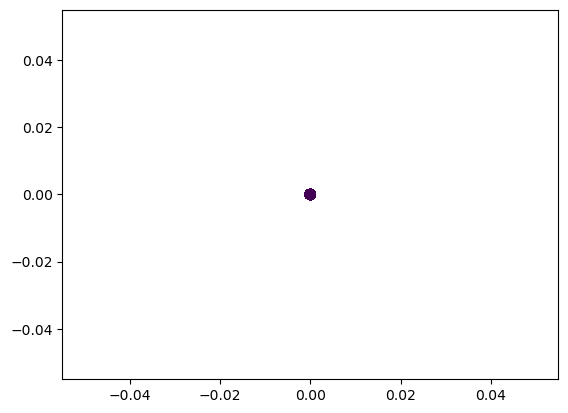

In [208]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

pred_cluster_label = []
silhouette_scores = []      
best_k = 2
max_sil = 0

# Perform KMeans clustering for different k values
for i in range(2, 6):
    kmeans = KMeans(n_clusters=i)
    kmeans_data = kmeans.fit_predict(features_without_stacks)
    pred_cluster_label.append(kmeans_data)
    print('k: ',i)
    print(kmeans_data)
    # Finding silhouette score for each cluster number
    silhouette_cur = silhouette_score(features_without_stacks, kmeans_data)
    print('Silhouette current: ',silhouette_cur)
    if(silhouette_cur > max_sil):
        max_sil = silhouette_cur
        best_k = i
# Finding best k
# best_k = silhouette_scores.index(max(silhouette_scores)) + 2
print('Best k: ',best_k)
scatter(features_without_stacks, pd.Series(pred_cluster_label[best_k - 2]))

In [209]:
print(kmeans_data)

[4 3 2 ... 0 0 0]
